In [4]:
import xarray as xr
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from dask.distributed import Client, progress


In [2]:
client = Client()

/Users/jonniebarnsley/opt/anaconda3/envs/phd/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53741 instead
  warnings.warn(


In [3]:
run_num = 1
path = Path('/Users/jonniebarnsley/Downloads')

In [4]:
# Load datasets
xds = xr.open_dataset(path / f'xVel/lasagne_run0{run_num}_xVel_3lev.nc', chunks='auto')
yds = xr.open_dataset(path / f'yVel/lasagne_run0{run_num}_yVel_3lev.nc', chunks='auto')
obs_ds = xr.open_dataset('/Users/jonniebarnsley/data/MEaSUREs/MEaSUREs_antarctica_v2_bisicles_1km.nc', chunks='auto')

xVel = xds.xVel
yVel = yds.yVel
obs = obs_ds.speed

# Compute speed and misfit
speed = np.hypot(xVel, yVel)
misfit = speed - obs
norm = abs(misfit).sum(dim=['x', 'y'])
norm.name = 'misfit_L1_norm'

future = client.compute(norm)
progress(future)

VBox()

In [6]:
norm_result = future.result()
norm_result.name='misfit_L1_norm'
norm_result

<xarray.DataArray 'misfit_L1_norm' (time: 155)>
array([1.40302734e+08, 1.38155367e+08, 1.37712500e+08, 1.37462209e+08,
       1.37294851e+08, 1.37171549e+08, 1.37070951e+08, 1.36992342e+08,
       1.36907923e+08, 1.36838639e+08, 1.13134253e+08, 1.12852860e+08,
       1.12678360e+08, 1.12575413e+08, 1.12473972e+08, 1.12386567e+08,
       1.12318743e+08, 1.12263555e+08, 1.12226850e+08, 1.12147882e+08,
       1.01769300e+08, 1.01666379e+08, 1.01619322e+08, 1.01609423e+08,
       1.01613221e+08, 1.01628017e+08, 1.01653817e+08, 1.01682420e+08,
       1.01707110e+08, 1.01731334e+08, 9.61556916e+07, 9.60882862e+07,
       9.60733334e+07, 9.60767928e+07, 9.60934463e+07, 9.61424419e+07,
       9.61652969e+07, 9.61970017e+07, 9.62240571e+07, 9.62584198e+07,
       9.27732607e+07, 9.27315353e+07, 9.27211307e+07, 9.27248378e+07,
       9.27394073e+07, 9.27394073e+07, 9.27589332e+07, 9.27834592e+07,
       9.28121748e+07, 9.28441623e+07, 9.28765264e+07, 9.00090760e+07,
       9.00194144e+07, 9.01180520e+07, 9.04304507e+07, 9.01766207e+07,
       9.04519187e+07, 9.04396885e+07, 9.02364885e+07, 9.04640103e+07,
       9.05361213e+07, 8.82922508e+07, 8.83028768e+07, 8.82574715e+07,
       8.82883077e+07, 8.83255402e+07, 8.83692558e+07, 8.84191406e+07,
       8.84682359e+07, 8.85177652e+07, 8.85675925e+07, 8.86183590e+07,
       8.86702536e+07, 8.87216999e+07, 8.87745381e+07, 8.88224532e+07,
       8.88728037e+07, 8.89233252e+07, 8.89769198e+07, 8.90292803e+07,
       8.68898194e+07, 8.69010604e+07, 8.69189395e+07, 8.69400394e+07,
       8.69400420e+07, 8.69679837e+07, 8.70009820e+07, 8.70369737e+07,
       8.70702387e+07, 8.71080283e+07, 8.71080320e+07, 8.71442611e+07,
       8.55740427e+07, 8.56146957e+07, 8.56619802e+07, 8.57090132e+07,
       8.57090417e+07, 8.57627462e+07, 8.58113946e+07, 8.58558925e+07,
       8.59043832e+07, 8.59547512e+07, 8.60044516e+07, 8.45813360e+07,
       8.46094226e+07, 8.46463332e+07, 8.46847943e+07, 8.47252460e+07,
       8.47709849e+07, 8.48128500e+07, 8.48572455e+07, 8.48959023e+07,
       8.49405512e+07, 8.34285243e+07, 8.34669601e+07, 8.35211310e+07,
       8.35723492e+07, 8.36234351e+07, 8.36705195e+07, 8.37189279e+07,
       8.37718744e+07, 8.38195486e+07, 8.38678655e+07, 8.39170725e+07,
       8.24678767e+07, 8.25052120e+07, 8.26420715e+07, 8.26797524e+07,
       8.26542093e+07, 8.27364743e+07, 8.28586724e+07, 8.28541990e+07,
       8.28422733e+07, 8.29189636e+07, 8.18168610e+07, 8.17704035e+07,
       8.18346457e+07, 8.18485912e+07, 8.18835202e+07, 8.19319018e+07,
       8.19774607e+07, 8.20235572e+07, 8.20690076e+07, 8.21148603e+07,
       8.13005579e+07, 8.13283071e+07, 8.13545785e+07, 8.13901502e+07,
       8.14279608e+07, 8.14665185e+07, 8.15078707e+07, 8.15487238e+07,
       8.15852406e+07, 8.16258421e+07, 8.08736578e+07])
Coordinates:
  * time     (time) float64 0.0 0.1 0.2 0.3 0.4 0.5 ... 14.6 14.7 14.8 14.9 15.0

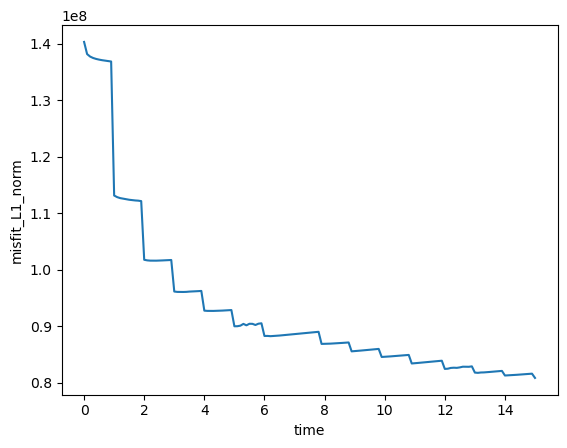

In [7]:
norm_result.plot()

In [8]:
norm_result.to_netcdf(f'/Users/jonniebarnsley/data/inversions/axial/misfit_l1_norm/lasagne_inversion_run0{run_num}_misfit_l1_norm.nc')

In [9]:
run_num=7
files = [xr.open_dataset(
    f'/Users/jonniebarnsley/data/inversions/axial/misfit_l1_norm/lasagne_inversion_run0{run_num}_misfit_l1_norm.nc').misfit_l1_norm \
         for run_num in range(1, run_num+1)]

In [10]:
ensemble = xr.concat(files, dim='run')
ensemble = ensemble.assign_coords(run=range(1, run_num+1))


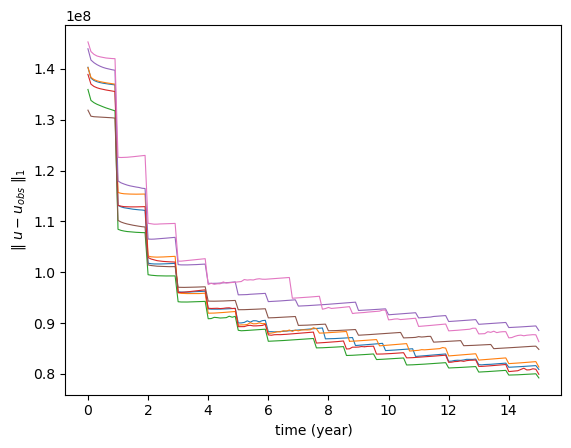

In [16]:
for run in range(run_num):
    plt.plot(ensemble.time, ensemble.isel(run=run), lw=0.8)
    plt.ylabel('$\|\ u-u_{obs}\ \|_1$')
    plt.xlabel('time (year)')
#plt.yscale('log')
plt.savefig('/Users/jonniebarnsley/Downloads/example.png', dpi=600)